## Projet IA Pour L'image
### K-Means sur la base "Intel Image Classification"

#### Pourquoi cette méthode ?
La méthode du "K-moyennes" est à peut près similaire à celle du SVM. Nous allons classifier les images afin de leur attribuer un point en deux dimensions. 

De ces points en deux dimensions, nous allons former des groupes de ces plusieurs points, dans ces groupes, nous aurons un point centrale, qui est la moyennes de tout les points. Donc tout les points graviterons autour de ce point central. Ces groupes s'appelleront les "cluster" et chaque clusters répresentera des données "similaires" trouvées dans les images du même groupe.

Dans notre cas, on a 6 classes, soit : buildings, forest, glacier, mountain, sea, street. Si on définit que l'on veut 6 clusteur. La classification se limitera à 6 clusters et les groupes pourraient être imprécis. Cependant plus on défnit un nombre de clusters élevés, plus on aura des sous-groupes d'images, avec des ressemblances précises entre elles. Donc l'algorithme de K-Means aura moins de chances de se tromper lors de ses prédictions. 

##### Installations nécessaires
pip install -U scikit-learn

pip install PIL

pip install matplotlib

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

import os
import random

from PIL import Image,ImageFilter

import matplotlib.pyplot as plt

import cv2
import numpy as np

In [2]:
dataset = []
dataset_folder = ".\\dataset_IntelImageClassification\\"

for label in os.listdir(dataset_folder):
    for filename in os.listdir(os.path.join(dataset_folder,label)):
        print(str(label) + " - " + str(filename) )
        image = Image.open(os.path.join(dataset_folder,label,filename))
        image.load()
        image = np.asarray(image, dtype="float32" )
        dataset.append((image, label))

buildings - 0.jpg
buildings - 10006.jpg
buildings - 1001.jpg
buildings - 10014.jpg
buildings - 10018.jpg
buildings - 10029.jpg
buildings - 10032.jpg
buildings - 10056.jpg
buildings - 1009.jpg
buildings - 10113.jpg
buildings - 1012.jpg
buildings - 10126.jpg
buildings - 10144.jpg
buildings - 10151.jpg
buildings - 10161.jpg
buildings - 10165.jpg
buildings - 10176.jpg
buildings - 10184.jpg
buildings - 10185.jpg
buildings - 10191.jpg
buildings - 10196.jpg
buildings - 10198.jpg
buildings - 10205.jpg
buildings - 10210.jpg
buildings - 10228.jpg
buildings - 10231.jpg
buildings - 10251.jpg
buildings - 10252.jpg
buildings - 10257.jpg
buildings - 10266.jpg
buildings - 10278.jpg
buildings - 1028.jpg
buildings - 10295.jpg
buildings - 10303.jpg
buildings - 10306.jpg
buildings - 10310.jpg
buildings - 10312.jpg
buildings - 10316.jpg
buildings - 10318.jpg
buildings - 10328.jpg
buildings - 10350.jpg
buildings - 10357.jpg
buildings - 10362.jpg
buildings - 10367.jpg
buildings - 10374.jpg
buildings - 10383.

buildings - 14184.jpg
buildings - 14189.jpg
buildings - 14194.jpg
buildings - 142.jpg
buildings - 14205.jpg
buildings - 14212.jpg
buildings - 14217.jpg
buildings - 14218.jpg
buildings - 14231.jpg
buildings - 14246.jpg
buildings - 14247.jpg
buildings - 14261.jpg
buildings - 14284.jpg
buildings - 1429.jpg
buildings - 14294.jpg
buildings - 14295.jpg
buildings - 14297.jpg
buildings - 14300.jpg
buildings - 14318.jpg
buildings - 14321.jpg
buildings - 14365.jpg
buildings - 14372.jpg
buildings - 14383.jpg
buildings - 14389.jpg
buildings - 14410.jpg
buildings - 14416.jpg
buildings - 14434.jpg
buildings - 14439.jpg
buildings - 14447.jpg
buildings - 1445.jpg
buildings - 14454.jpg
buildings - 14456.jpg
buildings - 14464.jpg
buildings - 14467.jpg
buildings - 14474.jpg
buildings - 14521.jpg
buildings - 14525.jpg
buildings - 14535.jpg
buildings - 14543.jpg
buildings - 14548.jpg
buildings - 14556.jpg
buildings - 14565.jpg
buildings - 14568.jpg
buildings - 14576.jpg
buildings - 14577.jpg
buildings - 14

buildings - 17264.jpg
buildings - 17267.jpg
buildings - 17270.jpg
buildings - 17272.jpg
buildings - 17273.jpg
buildings - 17296.jpg
buildings - 17302.jpg
buildings - 17308.jpg
buildings - 17322.jpg
buildings - 17330.jpg
buildings - 17332.jpg
buildings - 17337.jpg
buildings - 17338.jpg
buildings - 17345.jpg
buildings - 17354.jpg
buildings - 1739.jpg
buildings - 17397.jpg
buildings - 17401.jpg
buildings - 17403.jpg
buildings - 17406.jpg
buildings - 17416.jpg
buildings - 17418.jpg
buildings - 17425.jpg
buildings - 17427.jpg
buildings - 17450.jpg
buildings - 17451.jpg
buildings - 17452.jpg
buildings - 17453.jpg
buildings - 17457.jpg
buildings - 17462.jpg
buildings - 17468.jpg
buildings - 17479.jpg
buildings - 17480.jpg
buildings - 17491.jpg
buildings - 17495.jpg
buildings - 17503.jpg
buildings - 1751.jpg
buildings - 17516.jpg
buildings - 17520.jpg
buildings - 1753.jpg
buildings - 17537.jpg
buildings - 17539.jpg
buildings - 17541.jpg
buildings - 17545.jpg
buildings - 17551.jpg
buildings - 1

buildings - 3905.jpg
buildings - 3912.jpg
buildings - 3913.jpg
buildings - 392.jpg
buildings - 3920.jpg
buildings - 3921.jpg
buildings - 3928.jpg
buildings - 3929.jpg
buildings - 3931.jpg
buildings - 3955.jpg
buildings - 3956.jpg
buildings - 3971.jpg
buildings - 3989.jpg
buildings - 3991.jpg
buildings - 3992.jpg
buildings - 3993.jpg
buildings - 4.jpg
buildings - 4000.jpg
buildings - 4002.jpg
buildings - 401.jpg
buildings - 4012.jpg
buildings - 4016.jpg
buildings - 4042.jpg
buildings - 4053.jpg
buildings - 4057.jpg
buildings - 4060.jpg
buildings - 4067.jpg
buildings - 4075.jpg
buildings - 4079.jpg
buildings - 4082.jpg
buildings - 4098.jpg
buildings - 4100.jpg
buildings - 412.jpg
buildings - 4129.jpg
buildings - 4130.jpg
buildings - 4139.jpg
buildings - 4141.jpg
buildings - 4152.jpg
buildings - 4156.jpg
buildings - 4158.jpg
buildings - 4160.jpg
buildings - 4161.jpg
buildings - 4178.jpg
buildings - 422.jpg
buildings - 4233.jpg
buildings - 4239.jpg
buildings - 4244.jpg
buildings - 4253.jpg

buildings - 8639.jpg
buildings - 864.jpg
buildings - 8647.jpg
buildings - 8658.jpg
buildings - 8659.jpg
buildings - 8682.jpg
buildings - 8683.jpg
buildings - 869.jpg
buildings - 8701.jpg
buildings - 8705.jpg
buildings - 8713.jpg
buildings - 8723.jpg
buildings - 8746.jpg
buildings - 8748.jpg
buildings - 8752.jpg
buildings - 8777.jpg
buildings - 878.jpg
buildings - 8786.jpg
buildings - 8788.jpg
buildings - 8792.jpg
buildings - 8797.jpg
buildings - 8801.jpg
buildings - 8810.jpg
buildings - 8813.jpg
buildings - 8821.jpg
buildings - 8822.jpg
buildings - 8824.jpg
buildings - 8830.jpg
buildings - 8838.jpg
buildings - 8843.jpg
buildings - 8859.jpg
buildings - 8878.jpg
buildings - 8891.jpg
buildings - 8896.jpg
buildings - 8897.jpg
buildings - 8903.jpg
buildings - 8912.jpg
buildings - 8914.jpg
buildings - 8915.jpg
buildings - 8921.jpg
buildings - 8923.jpg
buildings - 8933.jpg
buildings - 8948.jpg
buildings - 8964.jpg
buildings - 8966.jpg
buildings - 897.jpg
buildings - 8976.jpg
buildings - 8985.

forest - 12548.jpg
forest - 12560.jpg
forest - 12566.jpg
forest - 12569.jpg
forest - 12572.jpg
forest - 12576.jpg
forest - 12581.jpg
forest - 12591.jpg
forest - 12592.jpg
forest - 12594.jpg
forest - 1261.jpg
forest - 12610.jpg
forest - 12621.jpg
forest - 12630.jpg
forest - 12641.jpg
forest - 12644.jpg
forest - 12646.jpg
forest - 12657.jpg
forest - 12664.jpg
forest - 12672.jpg
forest - 12676.jpg
forest - 12679.jpg
forest - 12694.jpg
forest - 12699.jpg
forest - 12704.jpg
forest - 12711.jpg
forest - 12717.jpg
forest - 12718.jpg
forest - 12721.jpg
forest - 12726.jpg
forest - 12739.jpg
forest - 12743.jpg
forest - 12757.jpg
forest - 12768.jpg
forest - 12772.jpg
forest - 12783.jpg
forest - 12786.jpg
forest - 12787.jpg
forest - 12788.jpg
forest - 12790.jpg
forest - 12799.jpg
forest - 12808.jpg
forest - 12814.jpg
forest - 12823.jpg
forest - 12826.jpg
forest - 12849.jpg
forest - 1285.jpg
forest - 12855.jpg
forest - 1286.jpg
forest - 12868.jpg
forest - 12881.jpg
forest - 12888.jpg
forest - 12890.

forest - 16585.jpg
forest - 1659.jpg
forest - 16600.jpg
forest - 16602.jpg
forest - 16609.jpg
forest - 16610.jpg
forest - 16611.jpg
forest - 16615.jpg
forest - 16616.jpg
forest - 16625.jpg
forest - 1663.jpg
forest - 16638.jpg
forest - 16641.jpg
forest - 16646.jpg
forest - 16648.jpg
forest - 16658.jpg
forest - 16667.jpg
forest - 167.jpg
forest - 1670.jpg
forest - 16711.jpg
forest - 16732.jpg
forest - 16735.jpg
forest - 16736.jpg
forest - 16755.jpg
forest - 16757.jpg
forest - 16761.jpg
forest - 1677.jpg
forest - 16773.jpg
forest - 16775.jpg
forest - 16778.jpg
forest - 16792.jpg
forest - 16812.jpg
forest - 16817.jpg
forest - 16830.jpg
forest - 16835.jpg
forest - 16861.jpg
forest - 16867.jpg
forest - 16891.jpg
forest - 16896.jpg
forest - 1690.jpg
forest - 16913.jpg
forest - 16917.jpg
forest - 1692.jpg
forest - 16920.jpg
forest - 16928.jpg
forest - 16929.jpg
forest - 16946.jpg
forest - 16949.jpg
forest - 16951.jpg
forest - 16953.jpg
forest - 16974.jpg
forest - 16975.jpg
forest - 16977.jpg
f

forest - 240.jpg
forest - 2400.jpg
forest - 2410.jpg
forest - 2445.jpg
forest - 2457.jpg
forest - 2465.jpg
forest - 2468.jpg
forest - 247.jpg
forest - 2496.jpg
forest - 2497.jpg
forest - 2504.jpg
forest - 2512.jpg
forest - 2520.jpg
forest - 2526.jpg
forest - 2535.jpg
forest - 2537.jpg
forest - 257.jpg
forest - 2581.jpg
forest - 2582.jpg
forest - 2584.jpg
forest - 2591.jpg
forest - 2599.jpg
forest - 2600.jpg
forest - 2601.jpg
forest - 2613.jpg
forest - 2626.jpg
forest - 2638.jpg
forest - 2655.jpg
forest - 2658.jpg
forest - 2661.jpg
forest - 267.jpg
forest - 2674.jpg
forest - 2676.jpg
forest - 2681.jpg
forest - 269.jpg
forest - 2699.jpg
forest - 270.jpg
forest - 2744.jpg
forest - 2746.jpg
forest - 277.jpg
forest - 2787.jpg
forest - 2793.jpg
forest - 2800.jpg
forest - 2831.jpg
forest - 2840.jpg
forest - 2849.jpg
forest - 2859.jpg
forest - 2862.jpg
forest - 2888.jpg
forest - 2889.jpg
forest - 2892.jpg
forest - 2893.jpg
forest - 2894.jpg
forest - 2900.jpg
forest - 2909.jpg
forest - 2914.jpg

forest - 6530.jpg
forest - 6532.jpg
forest - 6533.jpg
forest - 6551.jpg
forest - 6555.jpg
forest - 6566.jpg
forest - 6578.jpg
forest - 6590.jpg
forest - 6616.jpg
forest - 6618.jpg
forest - 663.jpg
forest - 6646.jpg
forest - 6653.jpg
forest - 6654.jpg
forest - 6655.jpg
forest - 6661.jpg
forest - 6662.jpg
forest - 6666.jpg
forest - 6669.jpg
forest - 6680.jpg
forest - 6687.jpg
forest - 6723.jpg
forest - 6746.jpg
forest - 6765.jpg
forest - 6779.jpg
forest - 678.jpg
forest - 6789.jpg
forest - 6803.jpg
forest - 6804.jpg
forest - 6805.jpg
forest - 6812.jpg
forest - 6818.jpg
forest - 6823.jpg
forest - 6824.jpg
forest - 6836.jpg
forest - 6851.jpg
forest - 6854.jpg
forest - 6866.jpg
forest - 6870.jpg
forest - 6876.jpg
forest - 6887.jpg
forest - 6889.jpg
forest - 6893.jpg
forest - 6896.jpg
forest - 6899.jpg
forest - 690.jpg
forest - 6902.jpg
forest - 6910.jpg
forest - 6936.jpg
forest - 6940.jpg
forest - 6963.jpg
forest - 6968.jpg
forest - 6985.jpg
forest - 6990.jpg
forest - 7003.jpg
forest - 7007

glacier - 10637.jpg
glacier - 10639.jpg
glacier - 10640.jpg
glacier - 10650.jpg
glacier - 10663.jpg
glacier - 10664.jpg
glacier - 10670.jpg
glacier - 10689.jpg
glacier - 10690.jpg
glacier - 10693.jpg
glacier - 10704.jpg
glacier - 10709.jpg
glacier - 10710.jpg
glacier - 10711.jpg
glacier - 10719.jpg
glacier - 10722.jpg
glacier - 10723.jpg
glacier - 10741.jpg
glacier - 10747.jpg
glacier - 10759.jpg
glacier - 10765.jpg
glacier - 10779.jpg
glacier - 10781.jpg
glacier - 10788.jpg
glacier - 10793.jpg
glacier - 10795.jpg
glacier - 10796.jpg
glacier - 10801.jpg
glacier - 10808.jpg
glacier - 10820.jpg
glacier - 10838.jpg
glacier - 10848.jpg
glacier - 1085.jpg
glacier - 10854.jpg
glacier - 10870.jpg
glacier - 10874.jpg
glacier - 10881.jpg
glacier - 1089.jpg
glacier - 109.jpg
glacier - 10902.jpg
glacier - 10903.jpg
glacier - 10907.jpg
glacier - 10912.jpg
glacier - 10926.jpg
glacier - 10928.jpg
glacier - 10935.jpg
glacier - 10959.jpg
glacier - 10966.jpg
glacier - 1097.jpg
glacier - 10970.jpg
glaci

glacier - 14404.jpg
glacier - 14409.jpg
glacier - 14419.jpg
glacier - 1442.jpg
glacier - 1443.jpg
glacier - 14431.jpg
glacier - 14433.jpg
glacier - 14435.jpg
glacier - 14436.jpg
glacier - 14500.jpg
glacier - 14503.jpg
glacier - 14504.jpg
glacier - 14507.jpg
glacier - 14509.jpg
glacier - 14515.jpg
glacier - 14517.jpg
glacier - 1453.jpg
glacier - 14534.jpg
glacier - 14536.jpg
glacier - 14540.jpg
glacier - 14544.jpg
glacier - 14545.jpg
glacier - 14547.jpg
glacier - 14554.jpg
glacier - 1458.jpg
glacier - 14595.jpg
glacier - 14603.jpg
glacier - 14615.jpg
glacier - 14622.jpg
glacier - 14634.jpg
glacier - 14639.jpg
glacier - 1466.jpg
glacier - 14675.jpg
glacier - 14680.jpg
glacier - 14689.jpg
glacier - 1469.jpg
glacier - 14690.jpg
glacier - 14709.jpg
glacier - 14734.jpg
glacier - 14740.jpg
glacier - 14750.jpg
glacier - 14754.jpg
glacier - 1476.jpg
glacier - 14770.jpg
glacier - 14777.jpg
glacier - 14781.jpg
glacier - 14782.jpg
glacier - 14802.jpg
glacier - 14834.jpg
glacier - 14845.jpg
glacier

glacier - 18715.jpg
glacier - 1873.jpg
glacier - 18736.jpg
glacier - 18753.jpg
glacier - 18773.jpg
glacier - 18781.jpg
glacier - 18783.jpg
glacier - 18785.jpg
glacier - 1880.jpg
glacier - 18808.jpg
glacier - 18809.jpg
glacier - 1881.jpg
glacier - 18819.jpg
glacier - 18820.jpg
glacier - 18821.jpg
glacier - 18828.jpg
glacier - 18829.jpg
glacier - 18831.jpg
glacier - 18832.jpg
glacier - 18834.jpg
glacier - 18853.jpg
glacier - 18863.jpg
glacier - 18864.jpg
glacier - 18870.jpg
glacier - 18899.jpg
glacier - 189.jpg
glacier - 18906.jpg
glacier - 18909.jpg
glacier - 18911.jpg
glacier - 18916.jpg
glacier - 18925.jpg
glacier - 18927.jpg
glacier - 18929.jpg
glacier - 1894.jpg
glacier - 18941.jpg
glacier - 18963.jpg
glacier - 18989.jpg
glacier - 190.jpg
glacier - 19005.jpg
glacier - 19019.jpg
glacier - 19020.jpg
glacier - 19037.jpg
glacier - 1904.jpg
glacier - 19040.jpg
glacier - 19044.jpg
glacier - 19049.jpg
glacier - 19058.jpg
glacier - 19067.jpg
glacier - 19094.jpg
glacier - 19095.jpg
glacier -

glacier - 4892.jpg
glacier - 4893.jpg
glacier - 4902.jpg
glacier - 4907.jpg
glacier - 4928.jpg
glacier - 4937.jpg
glacier - 4942.jpg
glacier - 496.jpg
glacier - 4962.jpg
glacier - 4966.jpg
glacier - 4967.jpg
glacier - 4969.jpg
glacier - 4975.jpg
glacier - 4981.jpg
glacier - 4997.jpg
glacier - 5019.jpg
glacier - 5027.jpg
glacier - 503.jpg
glacier - 504.jpg
glacier - 5046.jpg
glacier - 5051.jpg
glacier - 5054.jpg
glacier - 5056.jpg
glacier - 5064.jpg
glacier - 5078.jpg
glacier - 5091.jpg
glacier - 5101.jpg
glacier - 5108.jpg
glacier - 5135.jpg
glacier - 5138.jpg
glacier - 5148.jpg
glacier - 5155.jpg
glacier - 5159.jpg
glacier - 5169.jpg
glacier - 517.jpg
glacier - 5185.jpg
glacier - 5198.jpg
glacier - 5199.jpg
glacier - 5204.jpg
glacier - 5209.jpg
glacier - 5210.jpg
glacier - 5217.jpg
glacier - 5226.jpg
glacier - 523.jpg
glacier - 5237.jpg
glacier - 5240.jpg
glacier - 5262.jpg
glacier - 5268.jpg
glacier - 5273.jpg
glacier - 5275.jpg
glacier - 5280.jpg
glacier - 5286.jpg
glacier - 5290.jp

glacier - 9584.jpg
glacier - 9587.jpg
glacier - 9592.jpg
glacier - 9597.jpg
glacier - 9608.jpg
glacier - 9635.jpg
glacier - 9636.jpg
glacier - 9646.jpg
glacier - 965.jpg
glacier - 9650.jpg
glacier - 9657.jpg
glacier - 9659.jpg
glacier - 9674.jpg
glacier - 9675.jpg
glacier - 969.jpg
glacier - 9705.jpg
glacier - 9714.jpg
glacier - 9726.jpg
glacier - 9729.jpg
glacier - 9754.jpg
glacier - 9766.jpg
glacier - 9773.jpg
glacier - 9778.jpg
glacier - 9787.jpg
glacier - 9788.jpg
glacier - 981.jpg
glacier - 9813.jpg
glacier - 9815.jpg
glacier - 982.jpg
glacier - 9820.jpg
glacier - 9831.jpg
glacier - 9833.jpg
glacier - 9841.jpg
glacier - 9853.jpg
glacier - 9859.jpg
glacier - 9877.jpg
glacier - 988.jpg
glacier - 9888.jpg
glacier - 9890.jpg
glacier - 9892.jpg
glacier - 9893.jpg
glacier - 9906.jpg
glacier - 9919.jpg
glacier - 9927.jpg
glacier - 9935.jpg
glacier - 9943.jpg
glacier - 9951.jpg
glacier - 9956.jpg
glacier - 9958.jpg
glacier - 9971.jpg
glacier - 9974.jpg
glacier - 998.jpg
glacier - 9984.jpg

mountain - 12515.jpg
mountain - 12518.jpg
mountain - 1252.jpg
mountain - 12521.jpg
mountain - 12522.jpg
mountain - 12526.jpg
mountain - 12528.jpg
mountain - 12529.jpg
mountain - 12534.jpg
mountain - 12547.jpg
mountain - 12549.jpg
mountain - 12558.jpg
mountain - 12559.jpg
mountain - 12567.jpg
mountain - 1257.jpg
mountain - 12579.jpg
mountain - 12584.jpg
mountain - 12588.jpg
mountain - 12595.jpg
mountain - 12598.jpg
mountain - 12599.jpg
mountain - 12600.jpg
mountain - 12613.jpg
mountain - 12616.jpg
mountain - 1262.jpg
mountain - 12627.jpg
mountain - 12638.jpg
mountain - 12639.jpg
mountain - 12640.jpg
mountain - 12651.jpg
mountain - 12652.jpg
mountain - 12654.jpg
mountain - 12655.jpg
mountain - 12661.jpg
mountain - 12663.jpg
mountain - 12667.jpg
mountain - 12673.jpg
mountain - 12678.jpg
mountain - 12681.jpg
mountain - 12690.jpg
mountain - 12696.jpg
mountain - 12698.jpg
mountain - 12701.jpg
mountain - 12702.jpg
mountain - 12708.jpg
mountain - 12710.jpg
mountain - 12728.jpg
mountain - 12747

mountain - 1642.jpg
mountain - 16421.jpg
mountain - 16435.jpg
mountain - 16438.jpg
mountain - 16439.jpg
mountain - 1645.jpg
mountain - 16458.jpg
mountain - 16459.jpg
mountain - 1646.jpg
mountain - 16460.jpg
mountain - 16469.jpg
mountain - 16473.jpg
mountain - 16479.jpg
mountain - 16503.jpg
mountain - 16506.jpg
mountain - 1651.jpg
mountain - 16510.jpg
mountain - 16515.jpg
mountain - 16518.jpg
mountain - 16529.jpg
mountain - 16531.jpg
mountain - 16533.jpg
mountain - 16560.jpg
mountain - 16570.jpg
mountain - 1658.jpg
mountain - 16582.jpg
mountain - 16586.jpg
mountain - 16590.jpg
mountain - 16592.jpg
mountain - 16598.jpg
mountain - 16599.jpg
mountain - 16604.jpg
mountain - 1661.jpg
mountain - 16627.jpg
mountain - 16629.jpg
mountain - 16636.jpg
mountain - 16640.jpg
mountain - 16644.jpg
mountain - 16645.jpg
mountain - 16655.jpg
mountain - 16659.jpg
mountain - 1666.jpg
mountain - 16664.jpg
mountain - 16669.jpg
mountain - 16671.jpg
mountain - 16673.jpg
mountain - 16674.jpg
mountain - 16675.jpg

mountain - 2481.jpg
mountain - 2492.jpg
mountain - 2505.jpg
mountain - 2517.jpg
mountain - 2531.jpg
mountain - 2539.jpg
mountain - 254.jpg
mountain - 2543.jpg
mountain - 2569.jpg
mountain - 2570.jpg
mountain - 2571.jpg
mountain - 2573.jpg
mountain - 2578.jpg
mountain - 2579.jpg
mountain - 258.jpg
mountain - 2590.jpg
mountain - 2592.jpg
mountain - 2604.jpg
mountain - 2605.jpg
mountain - 2609.jpg
mountain - 2615.jpg
mountain - 2618.jpg
mountain - 2625.jpg
mountain - 2630.jpg
mountain - 2635.jpg
mountain - 2641.jpg
mountain - 2647.jpg
mountain - 2660.jpg
mountain - 2663.jpg
mountain - 2672.jpg
mountain - 2677.jpg
mountain - 2680.jpg
mountain - 2687.jpg
mountain - 2702.jpg
mountain - 2706.jpg
mountain - 2720.jpg
mountain - 2721.jpg
mountain - 2724.jpg
mountain - 2726.jpg
mountain - 2730.jpg
mountain - 2748.jpg
mountain - 2752.jpg
mountain - 2753.jpg
mountain - 2755.jpg
mountain - 276.jpg
mountain - 2762.jpg
mountain - 2769.jpg
mountain - 2772.jpg
mountain - 2773.jpg
mountain - 2799.jpg
mou

mountain - 6100.jpg
mountain - 6101.jpg
mountain - 6114.jpg
mountain - 6115.jpg
mountain - 6126.jpg
mountain - 6129.jpg
mountain - 6147.jpg
mountain - 6151.jpg
mountain - 6156.jpg
mountain - 6157.jpg
mountain - 6159.jpg
mountain - 6167.jpg
mountain - 6172.jpg
mountain - 6210.jpg
mountain - 6215.jpg
mountain - 6222.jpg
mountain - 6239.jpg
mountain - 6243.jpg
mountain - 6254.jpg
mountain - 6256.jpg
mountain - 6263.jpg
mountain - 6267.jpg
mountain - 6268.jpg
mountain - 6272.jpg
mountain - 6273.jpg
mountain - 6276.jpg
mountain - 6278.jpg
mountain - 6295.jpg
mountain - 6311.jpg
mountain - 6314.jpg
mountain - 6323.jpg
mountain - 6327.jpg
mountain - 6330.jpg
mountain - 6358.jpg
mountain - 6363.jpg
mountain - 6367.jpg
mountain - 6385.jpg
mountain - 6391.jpg
mountain - 6398.jpg
mountain - 6406.jpg
mountain - 6407.jpg
mountain - 6411.jpg
mountain - 6440.jpg
mountain - 6445.jpg
mountain - 6452.jpg
mountain - 6455.jpg
mountain - 6465.jpg
mountain - 6467.jpg
mountain - 6470.jpg
mountain - 6471.jpg


sea - 10473.jpg
sea - 10493.jpg
sea - 10494.jpg
sea - 10525.jpg
sea - 10529.jpg
sea - 10532.jpg
sea - 10543.jpg
sea - 10550.jpg
sea - 10551.jpg
sea - 10556.jpg
sea - 10565.jpg
sea - 10584.jpg
sea - 10595.jpg
sea - 10596.jpg
sea - 10602.jpg
sea - 10619.jpg
sea - 10621.jpg
sea - 10628.jpg
sea - 10644.jpg
sea - 10658.jpg
sea - 10671.jpg
sea - 10683.jpg
sea - 10686.jpg
sea - 107.jpg
sea - 10706.jpg
sea - 10715.jpg
sea - 10725.jpg
sea - 10739.jpg
sea - 10740.jpg
sea - 10745.jpg
sea - 1075.jpg
sea - 10750.jpg
sea - 10753.jpg
sea - 10766.jpg
sea - 10773.jpg
sea - 10775.jpg
sea - 10776.jpg
sea - 10789.jpg
sea - 10802.jpg
sea - 10803.jpg
sea - 10822.jpg
sea - 10826.jpg
sea - 10833.jpg
sea - 10840.jpg
sea - 10846.jpg
sea - 10856.jpg
sea - 10877.jpg
sea - 10882.jpg
sea - 10883.jpg
sea - 10887.jpg
sea - 10889.jpg
sea - 10904.jpg
sea - 10908.jpg
sea - 10942.jpg
sea - 10947.jpg
sea - 10948.jpg
sea - 10950.jpg
sea - 10955.jpg
sea - 10967.jpg
sea - 10973.jpg
sea - 1098.jpg
sea - 10982.jpg
sea - 10983.

sea - 15377.jpg
sea - 15393.jpg
sea - 15395.jpg
sea - 15407.jpg
sea - 15412.jpg
sea - 15413.jpg
sea - 15426.jpg
sea - 1543.jpg
sea - 15433.jpg
sea - 15443.jpg
sea - 15447.jpg
sea - 15453.jpg
sea - 15456.jpg
sea - 15460.jpg
sea - 15463.jpg
sea - 15464.jpg
sea - 15476.jpg
sea - 15479.jpg
sea - 15480.jpg
sea - 15483.jpg
sea - 15486.jpg
sea - 15497.jpg
sea - 15511.jpg
sea - 1553.jpg
sea - 15536.jpg
sea - 15546.jpg
sea - 15549.jpg
sea - 15579.jpg
sea - 15581.jpg
sea - 15582.jpg
sea - 15585.jpg
sea - 15588.jpg
sea - 15595.jpg
sea - 15604.jpg
sea - 15615.jpg
sea - 15617.jpg
sea - 15618.jpg
sea - 15622.jpg
sea - 15635.jpg
sea - 15637.jpg
sea - 15651.jpg
sea - 15656.jpg
sea - 15659.jpg
sea - 15661.jpg
sea - 15666.jpg
sea - 15671.jpg
sea - 15691.jpg
sea - 1570.jpg
sea - 15703.jpg
sea - 15711.jpg
sea - 15715.jpg
sea - 15736.jpg
sea - 15753.jpg
sea - 15769.jpg
sea - 15774.jpg
sea - 15775.jpg
sea - 15785.jpg
sea - 15790.jpg
sea - 15808.jpg
sea - 15809.jpg
sea - 15810.jpg
sea - 15814.jpg
sea - 15817

sea - 19705.jpg
sea - 19715.jpg
sea - 19716.jpg
sea - 19721.jpg
sea - 19723.jpg
sea - 19732.jpg
sea - 19750.jpg
sea - 1976.jpg
sea - 19764.jpg
sea - 19765.jpg
sea - 19768.jpg
sea - 19774.jpg
sea - 19777.jpg
sea - 1978.jpg
sea - 19780.jpg
sea - 19784.jpg
sea - 1980.jpg
sea - 19805.jpg
sea - 19810.jpg
sea - 19812.jpg
sea - 19818.jpg
sea - 1982.jpg
sea - 19833.jpg
sea - 19841.jpg
sea - 19845.jpg
sea - 19851.jpg
sea - 19853.jpg
sea - 19854.jpg
sea - 19865.jpg
sea - 19866.jpg
sea - 19876.jpg
sea - 19878.jpg
sea - 19898.jpg
sea - 19928.jpg
sea - 19932.jpg
sea - 19937.jpg
sea - 19947.jpg
sea - 19967.jpg
sea - 19971.jpg
sea - 1999.jpg
sea - 20.jpg
sea - 200.jpg
sea - 20000.jpg
sea - 20001.jpg
sea - 20010.jpg
sea - 20033.jpg
sea - 20041.jpg
sea - 20053.jpg
sea - 2006.jpg
sea - 2012.jpg
sea - 2015.jpg
sea - 2036.jpg
sea - 2042.jpg
sea - 2048.jpg
sea - 2052.jpg
sea - 2058.jpg
sea - 206.jpg
sea - 2061.jpg
sea - 2062.jpg
sea - 2063.jpg
sea - 207.jpg
sea - 2070.jpg
sea - 2073.jpg
sea - 2075.jpg
sea 

sea - 5822.jpg
sea - 5829.jpg
sea - 585.jpg
sea - 5858.jpg
sea - 5865.jpg
sea - 5874.jpg
sea - 5884.jpg
sea - 59.jpg
sea - 5900.jpg
sea - 5902.jpg
sea - 5916.jpg
sea - 5931.jpg
sea - 5938.jpg
sea - 5946.jpg
sea - 5976.jpg
sea - 5977.jpg
sea - 599.jpg
sea - 5990.jpg
sea - 5997.jpg
sea - 6015.jpg
sea - 603.jpg
sea - 604.jpg
sea - 6050.jpg
sea - 6052.jpg
sea - 6053.jpg
sea - 606.jpg
sea - 6060.jpg
sea - 6092.jpg
sea - 6111.jpg
sea - 6124.jpg
sea - 6125.jpg
sea - 613.jpg
sea - 6138.jpg
sea - 6139.jpg
sea - 6142.jpg
sea - 6150.jpg
sea - 6166.jpg
sea - 6171.jpg
sea - 6197.jpg
sea - 62.jpg
sea - 6208.jpg
sea - 6219.jpg
sea - 6221.jpg
sea - 6224.jpg
sea - 6226.jpg
sea - 623.jpg
sea - 6236.jpg
sea - 6237.jpg
sea - 6242.jpg
sea - 625.jpg
sea - 6260.jpg
sea - 6261.jpg
sea - 6269.jpg
sea - 6270.jpg
sea - 6274.jpg
sea - 6286.jpg
sea - 6301.jpg
sea - 6302.jpg
sea - 631.jpg
sea - 6312.jpg
sea - 6319.jpg
sea - 6336.jpg
sea - 6337.jpg
sea - 6338.jpg
sea - 6354.jpg
sea - 6359.jpg
sea - 6368.jpg
sea - 63

street - 1033.jpg
street - 10331.jpg
street - 10335.jpg
street - 10338.jpg
street - 10348.jpg
street - 10349.jpg
street - 10354.jpg
street - 10358.jpg
street - 10364.jpg
street - 10369.jpg
street - 10392.jpg
street - 104.jpg
street - 10408.jpg
street - 1042.jpg
street - 10430.jpg
street - 10431.jpg
street - 10448.jpg
street - 10459.jpg
street - 10463.jpg
street - 10470.jpg
street - 10472.jpg
street - 10490.jpg
street - 10503.jpg
street - 10504.jpg
street - 10514.jpg
street - 10516.jpg
street - 10524.jpg
street - 10526.jpg
street - 10540.jpg
street - 10547.jpg
street - 10548.jpg
street - 1056.jpg
street - 10569.jpg
street - 10573.jpg
street - 10580.jpg
street - 10588.jpg
street - 1059.jpg
street - 106.jpg
street - 10600.jpg
street - 10610.jpg
street - 10613.jpg
street - 10617.jpg
street - 10618.jpg
street - 10627.jpg
street - 10632.jpg
street - 10633.jpg
street - 10643.jpg
street - 10648.jpg
street - 10661.jpg
street - 10662.jpg
street - 10665.jpg
street - 1068.jpg
street - 10681.jpg
st

street - 1425.jpg
street - 14250.jpg
street - 14252.jpg
street - 14260.jpg
street - 14266.jpg
street - 14268.jpg
street - 14274.jpg
street - 14275.jpg
street - 14278.jpg
street - 14280.jpg
street - 14287.jpg
street - 14296.jpg
street - 14304.jpg
street - 14305.jpg
street - 14312.jpg
street - 14322.jpg
street - 14332.jpg
street - 14342.jpg
street - 1435.jpg
street - 14355.jpg
street - 14368.jpg
street - 14375.jpg
street - 14377.jpg
street - 14388.jpg
street - 1439.jpg
street - 14392.jpg
street - 14399.jpg
street - 14408.jpg
street - 14418.jpg
street - 14420.jpg
street - 14440.jpg
street - 14442.jpg
street - 14465.jpg
street - 14479.jpg
street - 14482.jpg
street - 14486.jpg
street - 14491.jpg
street - 14512.jpg
street - 14533.jpg
street - 14537.jpg
street - 14546.jpg
street - 14550.jpg
street - 14551.jpg
street - 14555.jpg
street - 14559.jpg
street - 14567.jpg
street - 14572.jpg
street - 14585.jpg
street - 14586.jpg
street - 14590.jpg
street - 14591.jpg
street - 14598.jpg
street - 14607.

street - 17927.jpg
street - 17947.jpg
street - 17965.jpg
street - 17970.jpg
street - 18001.jpg
street - 18002.jpg
street - 18003.jpg
street - 18005.jpg
street - 18006.jpg
street - 18012.jpg
street - 18016.jpg
street - 18018.jpg
street - 1803.jpg
street - 1804.jpg
street - 18059.jpg
street - 18060.jpg
street - 18086.jpg
street - 18095.jpg
street - 181.jpg
street - 18108.jpg
street - 18114.jpg
street - 18120.jpg
street - 18147.jpg
street - 18153.jpg
street - 18165.jpg
street - 18175.jpg
street - 18176.jpg
street - 18185.jpg
street - 18187.jpg
street - 18190.jpg
street - 18191.jpg
street - 18211.jpg
street - 18214.jpg
street - 18216.jpg
street - 18217.jpg
street - 18242.jpg
street - 18249.jpg
street - 18261.jpg
street - 1827.jpg
street - 18284.jpg
street - 18294.jpg
street - 18300.jpg
street - 18313.jpg
street - 18317.jpg
street - 18353.jpg
street - 18356.jpg
street - 18359.jpg
street - 1836.jpg
street - 18367.jpg
street - 18368.jpg
street - 18369.jpg
street - 18372.jpg
street - 1838.jpg


street - 3347.jpg
street - 3352.jpg
street - 3357.jpg
street - 3360.jpg
street - 3378.jpg
street - 338.jpg
street - 3383.jpg
street - 3392.jpg
street - 340.jpg
street - 3400.jpg
street - 3410.jpg
street - 3412.jpg
street - 342.jpg
street - 3434.jpg
street - 3438.jpg
street - 3440.jpg
street - 3447.jpg
street - 3453.jpg
street - 3454.jpg
street - 3461.jpg
street - 3462.jpg
street - 3473.jpg
street - 3475.jpg
street - 3489.jpg
street - 349.jpg
street - 3492.jpg
street - 3493.jpg
street - 35.jpg
street - 3500.jpg
street - 3501.jpg
street - 3503.jpg
street - 3505.jpg
street - 3516.jpg
street - 3529.jpg
street - 3534.jpg
street - 3539.jpg
street - 3543.jpg
street - 3545.jpg
street - 3546.jpg
street - 3547.jpg
street - 3556.jpg
street - 356.jpg
street - 3563.jpg
street - 3566.jpg
street - 3571.jpg
street - 358.jpg
street - 3588.jpg
street - 36.jpg
street - 3614.jpg
street - 3616.jpg
street - 3619.jpg
street - 3621.jpg
street - 3626.jpg
street - 3634.jpg
street - 3636.jpg
street - 3643.jpg
st

street - 7603.jpg
street - 7604.jpg
street - 7618.jpg
street - 7626.jpg
street - 7632.jpg
street - 7653.jpg
street - 7656.jpg
street - 7668.jpg
street - 7671.jpg
street - 7689.jpg
street - 7692.jpg
street - 770.jpg
street - 7702.jpg
street - 7717.jpg
street - 7718.jpg
street - 7726.jpg
street - 7741.jpg
street - 776.jpg
street - 7784.jpg
street - 7786.jpg
street - 7818.jpg
street - 782.jpg
street - 7828.jpg
street - 7829.jpg
street - 7834.jpg
street - 7837.jpg
street - 7839.jpg
street - 7850.jpg
street - 7853.jpg
street - 7863.jpg
street - 7876.jpg
street - 7888.jpg
street - 7889.jpg
street - 7897.jpg
street - 7902.jpg
street - 7910.jpg
street - 793.jpg
street - 7951.jpg
street - 7980.jpg
street - 80.jpg
street - 8003.jpg
street - 8021.jpg
street - 8026.jpg
street - 8029.jpg
street - 8031.jpg
street - 8032.jpg
street - 8051.jpg
street - 8055.jpg
street - 8058.jpg
street - 8061.jpg
street - 8063.jpg
street - 807.jpg
street - 8086.jpg
street - 8089.jpg
street - 8095.jpg
street - 8102.jpg

In [3]:
random.shuffle(dataset)

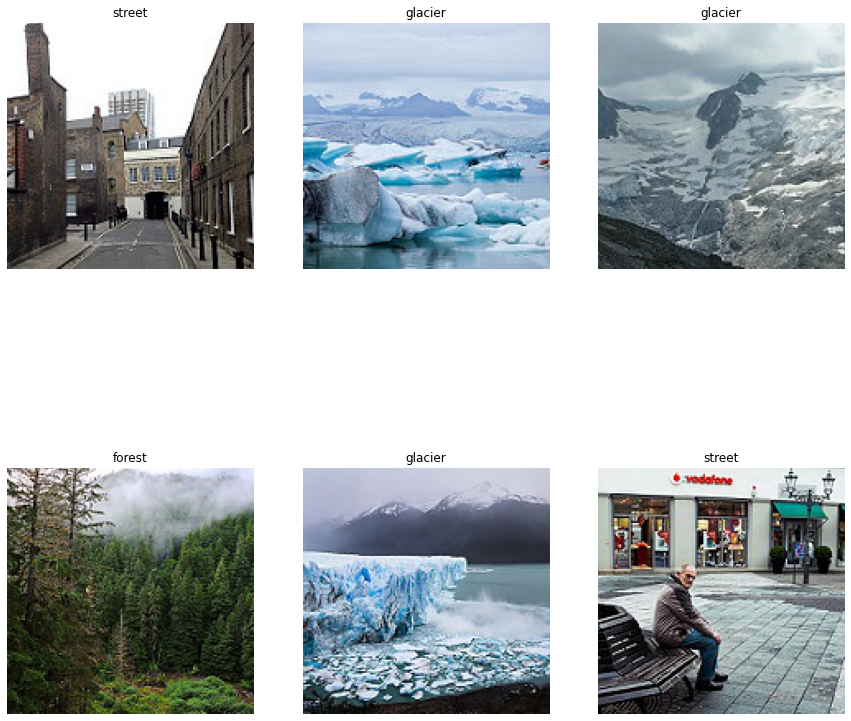

In [4]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.imshow(dataset[i][0].astype("int32"))
  ax.axis('off')
  ax.set_title(dataset[i][1])
plt.show()

In [5]:
image_size = (32, 32)
resized = []
for d in dataset:
    resized.append((cv2.resize(d[0], image_size), d[1]))
dataset = resized

In [6]:
images = np.asarray([d[0] for d in dataset])
print(images.shape)

images = images.reshape(len(images), -1)
print(images.shape)

images = images.astype(np.float32) / 255.

(14034, 32, 32, 3)
(14034, 3072)


Nous crééons notre premier ensemble de "groupes" en définissant notre nombre de clusters. et nous y integrons nos images afin que l'on puisse ensuite avoir la classification de nos images.

In [7]:
from sklearn.cluster import MiniBatchKMeans
number_clusters = 6
kmeans = MiniBatchKMeans(n_clusters=number_clusters)
kmeans.fit(images)

kmeans.labels_

C:\Users\const\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([2, 4, 4, ..., 3, 4, 2])

In [8]:
def map_clusters_classes(kmeans, classes):
  
    mapping = {}
    clusters = kmeans.predict(images)

    for i in range(kmeans.n_clusters):
        
        current_cluster_classes = []
        
        clusters_for_i = []
        for j in range (len(clusters)):
            if(clusters[j] == i):
                clusters_for_i.append(j)
        
        if(len(clusters_for_i) == 0):
            mapping[i] = 0
            continue
        
        for temp_classes in clusters_for_i:
            current_cluster_classes.append(classes[temp_classes])
        
        class_count = []
        for j in range(kmeans.n_clusters):
            class_count.append(0)

        for j in current_cluster_classes:
            class_count[j] += 1
        max_value = max(class_count)
        mapping[i] = class_count.index(max_value)
    return mapping

def inference(kmeans, images, classes):
    mapping = map_clusters_classes(kmeans, classes)
    clusters = kmeans.predict(images)
    predicted_classes = np.zeros(len(clusters)).astype(np.uint8)
    for i in range(len(clusters)):
        predicted_classes[i] = mapping[clusters[i]]
    return predicted_classes

In [9]:
labels_classes_mapping = {"buildings":0,"forest":1,"glacier":2,"mountain":3,"sea":4,"street":5}
classes = [labels_classes_mapping[d[1]] for d in dataset]
classes = np.asarray(classes)
predicted_classes = inference(kmeans, images, classes)

print(predicted_classes[:20])
print(classes[:20])

[3 4 4 5 4 5 1 4 5 2 1 3 2 2 2 3 5 4 2 3]
[5 2 2 1 2 5 1 0 3 0 3 3 3 5 3 5 1 4 2 3]


In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes, predicted_classes)
print('Accuracy: {}\n'.format(acc))

Accuracy: 0.4036625338463731



Nous trouvons en premier lieu une précision peu élevé, en mettant un nombre de cluster au même nombres de classes possibles, soit 6 dans notre cas.
Cependant, lorsque nous allons augmenter le nombre de cluster, la précision de l'algorithme K-Means va augmenter également.

In [12]:
number_clusters = [8, 16, 32, 64, 128, 256, 1024, 2048]
acc_list = []

for n_clusters in number_clusters:
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=4096)
    kmeans.fit(images)
    predicted_classes = inference(kmeans, images, classes)
    acc = accuracy_score(classes, predicted_classes)
    acc_list.append(acc)
    print(str(n_clusters) + " : ")
    print('Accuracy: {}\n'.format(acc))

8 : 
Accuracy: 0.3765141798489383

16 : 
Accuracy: 0.43038335470999

32 : 
Accuracy: 0.44064414992161893

64 : 
Accuracy: 0.46479977198232864

128 : 
Accuracy: 0.4960096907510332

256 : 
Accuracy: 0.5039190537266638

1024 : 
Accuracy: 0.5433946130825139

2048 : 
Accuracy: 0.5768134530426108



Nous arrivons à une précision d'environ 57% pour 2048 clusters créés dans notre classification d'images. 

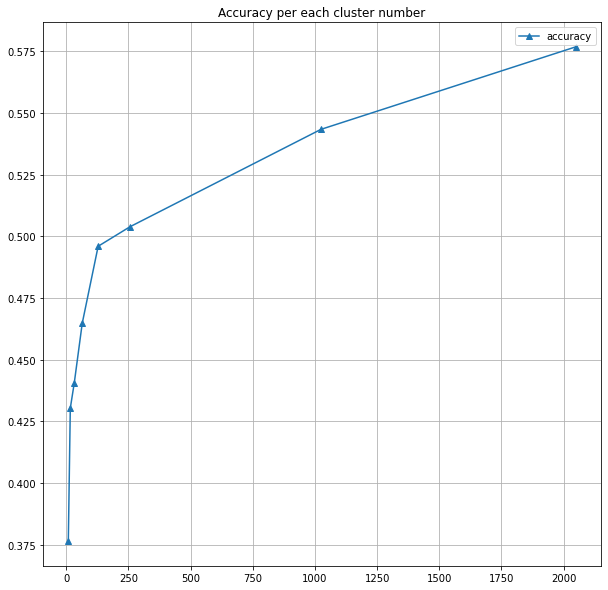

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(number_clusters, acc_list, label='accuracy', marker='^')
ax.legend(loc='best')
ax.grid('on')
ax.set_title('Accuracy per each cluster number')
plt.show()